# TP5 : Iteratives methods

## Jacobi method
%% latex 
Let's condider a matrix $A = D+R$
$
$lim_{x\to\infty}$

\lim\limits_{x \to \infty}

In [18]:
%%latex

$\lim\limits_{x^n \to \infty} x^s $ 

$Ax^s = b \newline$
$\newline$
$Dx^s + Rx^s = b$
$\newline$
$Dx^s = (b-Rx^s)$
$\newline$
$x^s = D^-1(b-Rx^s)$
$\newline$
$x^(k+1) = D^-1(b-Rx^k)$
$\newline$
Si la solution converge, elle converge vers $x^s$

<IPython.core.display.Latex object>

In [25]:
import numpy as np
import scipy

In [ ]:
def jacobi(A, b, x0=None, tol=1e−6, maxiter=200):
    
""" Jacobi solver
A is split into A = D + R, with D the diagonal
the iteration  consists of x {k+1} = Dˆ{−1}(b−R*x k )
Parameters
−−−−−−−−−−
A: a sparse (N, N) matrix
b , x0 : N elements v e c t o r s
t o l : the desired accuracy
maxiter : max number of i t e r a t i o n s
Returns
−−−−−−−
x : the solution , N element vector
info : int , 1 i f converged , 0 otherwise
"""

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse
from scipy.sparse import linalg as la

In [45]:



plt.ion()
import matplotlib as mpl

#plt.close('all')

mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.markersize'] = 12
mpl.rcParams['lines.markeredgewidth'] = 2
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['axes.labelsize'] = 14

nx = 8
ny = 4

Lx = 2
Ly = 1

shape = (ny, nx)
dx = Lx/nx
dy = Ly/ny

xc = (np.arange(nx)+0.5)*dx
yc = (np.arange(ny)+0.5)*dy

xxc, yyc = np.meshgrid(xc, yc)


# define msk
msk = np.ones(shape, dtype="b")
msk[:ny//3, :nx//3] = 0

print(msk)
N = msk.sum()
print("N=",N)


[[0 0 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]]
N= 30


In [46]:
# define G
# G is a very big vector
G = np.zeros(ny*nx, dtype="i")
#al the values are at -1
G[:] = -1
#define a vector with increasing values 0,1,2,3,...
#.flat transforms msk 2D into a 1D array
G[msk.flat>0] = np.arange(N)
G.shape = shape
print('G',G)
j, i = np.where(msk == 1)
print('value 12 is at =', i[12],j[12])
print(G[1,6-1])

G [[-1 -1  0  1  2  3  4  5]
 [ 6  7  8  9 10 11 12 13]
 [14 15 16 17 18 19 20 21]
 [22 23 24 25 26 27 28 29]]
value 12 is at = 6 1
11


In [47]:
# define laplacian

# regular neighbours West, East, South and North
#it's a dictionnary : there's a word : the definition here it's the label of the data and then the definition of it.
#For instance we can write the density of the ocean at a point:
parameters = {"rho":1000., 
              "g":9.81, 
              "Lx":250.,
              "x": np.arange(10)*.25}
type(parameters)
parameters.keys()
parameters["g"]

9.81

In [48]:
#neighbours upon, below, at the left, at the right namely
neighbours = {
    (-1, 0): dx/dy, #1/dy**2
    (1, 0): dx/dy, #1/dy**2
    (0, -1): dy/dx,#1/dx**2
    (0, 1): dy/dx  #1/dx**2
    }

In [49]:
#we define firstly the matrix
data = np.zeros((5*N,))
rows = np.zeros((5*N,), dtype=int)
cols = np.zeros((5*N,), dtype=int)
count = 0

In [50]:
for k in range(N):
    nbneighb = 0
    cdiag = 0.
    j0, i0 = j[k], i[k]
    #loop on the lables and the definition of each object 
    for who, coef in neighbours.items():
        dj, di = who[0], who[1]
        j1 = j0+dj
        i1 = i0+di
        # boolean that cheks if my value is between 0 and nx, 
        #to see if I'm at the edges of my matrix
        inside = ( (0 <= i1 < nx) and (0<= j1 < ny))
        # set the coefficient only if the neighbour is inside the grid
        if inside:
            l = G[j1, i1]
            # and is interior
            if l > -1:
                rows[count], cols[count], data[count] = k, l, coef
                #cont is to cont how many elements there are in my matrix
                count += 1
                nbneighb += coef
                cdiag -= coef
            else:
                cdiag -= 2*coef
        else:            
            cdiag -= 2*coef
        
    rows[count], cols[count], data[count] = k, k, cdiag
    count += 1
        

In [67]:
#loop on N, with N is the number of unknown values

A = sparse.coo_matrix(
    (data[:count], (rows[:count], cols[:count])),
    shape=(N, N) ).tocsr()

A_dense = sparse.csr_matrix.todense(A)

TS = scipy.sparse.triu(A, k=1)
TI = scipy.sparse.tril(A, k=-1)

TS_dense = sparse.csr_matrix.todense(TS)
TI_dense = sparse.csr_matrix.todense(TI)


R = TS + TI
R_dense = sparse.csr_matrix.todense(R)

A_diag = A-R
A_diag_dense = sparse.csr_matrix.todense(A_diag)

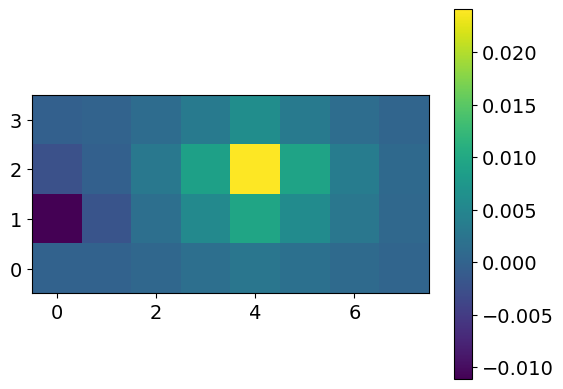

In [60]:
if True:
    b = np.zeros((N,))
    b[N//5] = 1
    b[3*N//5] =-1
    b *= dx*dy
    x = la.spsolve(A, b)
    phi = np.zeros(shape)
    phi[G>-1] = x

    plt.figure()
    plt.imshow(phi, origin="lower")
    plt.colorbar()
    plt.show()
else:
    d2 = (xxc-Lx*.3)**2 + (yyc-Ly*.7)**2
    rhs = np.exp(-d2/(2*0.1**2))
    d2 = (xxc-Lx*.6)**2 + (yyc-Ly*.2)**2
    rhs -= np.exp(-d2/(2*0.1**2))

    b = rhs[G>-1]
    b *= dx*dy
    x = la.spsolve(A, b)
    phi = np.zeros(shape)
    phi[G>-1] = x
    phi[G==-1] = np.nan

    plt.figure()
    plt.contourf(xc,yc, phi, 20)
    plt.colorbar()
    #plt.tight_layout()
    plt.axis("equal")
    plt.axis([0, Lx, 0, Ly])
    plt.show()

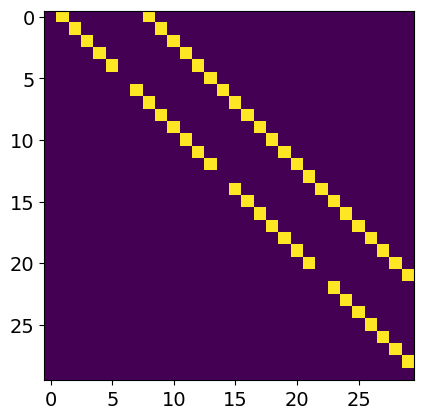

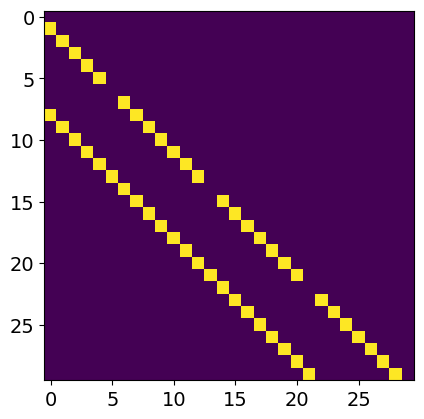

'\nplt.figure()\nplt.imshow(A_diag_dense)\nplt.show()\n'

In [68]:
#print(A_dense)

plt.figure()
plt.imshow(TS_dense)
plt.figure()
plt.imshow(TI_dense)
plt.show()
"""
plt.figure()
plt.imshow(A_diag_dense)
plt.show()
"""